Importing relevant Libraries 

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Read Files, Rename Variables & Merge Data 

In [ ]:
#Read & Transfrom secom.data 
df_secom_data = pd.read_csv('secom.data', delimiter=' ', header=None, na_values=['NaN'])
df_secom_data.columns = ['feature'+str(x+1) for x in range(len(df_secom_data.columns))]

#Normalization of df_secom_data
scaler = MinMaxScaler()
df_secom_data = pd.DataFrame(scaler.fit_transform(df_secom_data), columns=df_secom_data.columns)

#Read & Transform secom_labels.data 
df_secom_labels = pd.read_csv('secom_labels.data', delimiter=' ', header=None, na_values=['NaN'])
df_secom_labels.columns = ['status', 'timestamp']
df_secom_labels['timestamp'] = pd.to_datetime(df_secom_labels['timestamp'],dayfirst=True)
df_secom_labels['status'] = np.where(df_secom_labels['status']== -1,'pass','fail')

#Concat dataframes vertically
df_secom = pd.concat([df_secom_data,df_secom_labels],axis=1)
df_secom.head()

Explonatory Data Analysis Target Variable

In [26]:
#Frequency Table Absolute  
df_secom['status'].value_counts()

pass    1463
fail     104
Name: status, dtype: int64

In [27]:
#Frequency Table Relative 
df_secom['status'].value_counts(normalize=True)

pass    0.933631
fail    0.066369
Name: status, dtype: float64

Text(0.5, 1.0, 'Frequency Distribution of Target Variable')

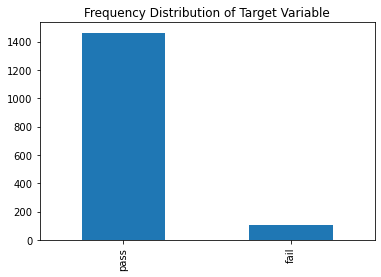

In [40]:
#Bar Plot of Target Variable
df_secom['status'].value_counts().plot(kind='bar').set_title('Frequency Distribution of Target Variable')

Explanatory Analysis Feature Data 

In [66]:
#Missing Values 
#Creating a Data Frame with percentage of Missing Values in the Feature Data 
percent_missing = df_secom_data.isnull().sum()*100 / len(df_secom_data)
df_na_percent = pd.DataFrame({'percent_missing': percent_missing})
df_na_percent

,percent_missing
feature1,0.382897
feature2,0.446713
feature3,0.893427
feature4,0.893427
feature5,0.893427
...,...
feature586,0.063816
feature587,0.063816
feature588,0.063816
feature589,0.063816


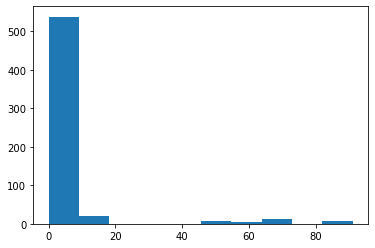

In [64]:
#histogram of missing Values
plt.hist(df_na_percent.percent_missing)
plt.show()

In [44]:
df_eda = df_secom_data.describe().T 
df_eda 

,count,mean,std,min,25%,50%,75%,max
feature1,1561.0,0.442356,0.120079,0.0,0.363752,0.437523,0.511181,1.0
feature2,1560.0,0.490192,0.116924,0.0,0.426788,0.495361,0.552680,1.0
feature3,1553.0,0.549425,0.115917,0.0,0.472825,0.551465,0.618191,1.0
feature4,1553.0,0.375871,0.118893,0.0,0.291215,0.345949,0.428319,1.0
feature5,1553.0,0.003156,0.050595,0.0,0.000302,0.000570,0.000758,1.0
...,...,...,...,...,...,...,...,...
feature586,1566.0,0.019064,0.036471,0.0,0.011304,0.015903,0.021382,1.0
feature587,1566.0,0.320455,0.103243,0.0,0.253342,0.312448,0.371763,1.0
feature588,1566.0,0.173076,0.114831,0.0,0.096480,0.151239,0.222947,1.0
feature589,1566.0,0.155193,0.103879,0.0,0.083333,0.130435,0.195652,1.0


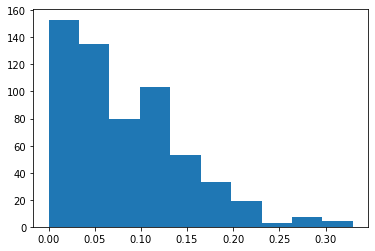

In [69]:
plt.hist(df_eda['std'])
plt.show()

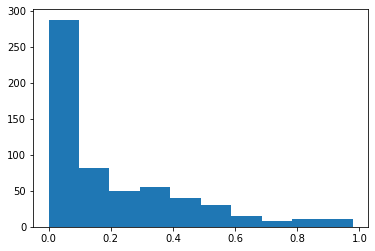

In [70]:
plt.hist(df_eda['mean'])
plt.show()

In [ ]:
df_secom_data.corr